In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [80]:
df = pd.read_csv('MagicBricks.csv')

In [81]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [83]:
df['Area'].dtype =='O'

False

In [84]:
numerical = [feature for feature in df.columns if df[feature].dtypes !='O']
categorical = [feature for feature in df.columns if df[feature].dtypes =='O']


In [85]:
numerical,categorical

(['Area', 'BHK', 'Bathroom', 'Parking', 'Price', 'Per_Sqft'],
 ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type'])

In [86]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [87]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [88]:
df_null = [ n for n in df if df[n].isnull().sum() > 1]

In [89]:
df_null

['Bathroom', 'Furnishing', 'Parking', 'Type', 'Per_Sqft']

In [90]:
print(df.Bathroom.isnull().sum())
df[df.Bathroom.isnull()]

2


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment,NaN
120,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment,NaN


In [91]:
print(df.Furnishing.isnull().sum())
df[df.Furnishing.isnull()]

5


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,2900000,Ready_to_move,Resale,NaN,58000.0
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,17000000,Ready_to_move,Resale,NaN,58000.0
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",NaN,25000000,Ready_to_move,Resale,NaN,18519.0
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,10000000,Ready_to_move,Resale,NaN,4444.0
719,1500.0,3,2.0,NaN,"Sarita Vihar, Mathura Road carpet area 1500 sq...",1.0,13500000,Ready_to_move,Resale,NaN,NaN


In [92]:
print(df.Type.isnull().sum())
df[df.Type.isnull()]

5


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,2900000,Ready_to_move,Resale,NaN,58000.0
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,17000000,Ready_to_move,Resale,NaN,58000.0
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",NaN,25000000,Ready_to_move,Resale,NaN,18519.0
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,10000000,Ready_to_move,Resale,NaN,4444.0
719,1500.0,3,2.0,NaN,"Sarita Vihar, Mathura Road carpet area 1500 sq...",1.0,13500000,Ready_to_move,Resale,NaN,NaN


In [93]:
print(df.Parking.isnull().sum())
df[df.Parking.isnull()]

33


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment,NaN
90,900.0,1,1.0,Semi-Furnished,Lajpat Nagar 3,NaN,8900000,Ready_to_move,Resale,Builder_Floor,NaN
120,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment,NaN
269,2799.0,4,4.0,Semi-Furnished,"Kailash Colony, Greater Kailash",NaN,65000000,Ready_to_move,New_Property,Builder_Floor,NaN
299,700.0,2,2.0,Unfurnished,"Ram Nagar, Shahdara",NaN,4600000,Ready_to_move,New_Property,Builder_Floor,NaN
300,750.0,2,2.0,Semi-Furnished,"Jyoti Nagar West, Shahdara",NaN,9200000,Ready_to_move,Resale,Builder_Floor,NaN
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,2900000,Ready_to_move,Resale,NaN,58000.0
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,17000000,Ready_to_move,Resale,NaN,58000.0
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",NaN,25000000,Ready_to_move,Resale,NaN,18519.0
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,10000000,Ready_to_move,Resale,NaN,4444.0


In [94]:
df[df.Per_Sqft.isnull()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment,NaN
31,800.0,2,2.0,Unfurnished,Lajpat Nagar 1,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,NaN
32,900.0,2,2.0,Unfurnished,Lajpat Nagar,1.0,10500000,Ready_to_move,New_Property,Builder_Floor,NaN
33,1080.0,3,2.0,Semi-Furnished,"Vikram Vihar, Lajpat Nagar",1.0,22500000,Ready_to_move,New_Property,Builder_Floor,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1185,900.0,2,2.0,Unfurnished,Kalkaji,2.0,15000000,Ready_to_move,Resale,Apartment,NaN
1199,2520.0,3,3.0,Unfurnished,Hauz Khas,NaN,47500000,Ready_to_move,New_Property,Builder_Floor,NaN
1200,1700.0,3,4.0,Unfurnished,Hauz Khas,2.0,45000000,Ready_to_move,New_Property,Builder_Floor,NaN
1229,2097.0,3,3.0,Unfurnished,Chittaranjan Park,NaN,29000000,Ready_to_move,Resale,Builder_Floor,NaN


In [95]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [96]:
for f in numerical:
    print(f)

Area
BHK
Bathroom
Parking
Price
Per_Sqft


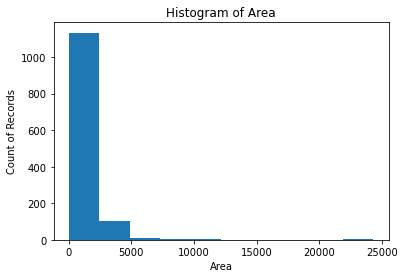

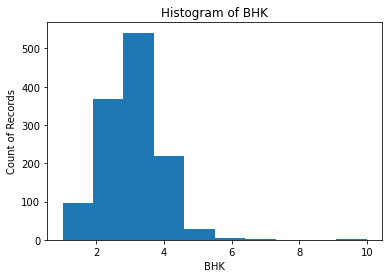

C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


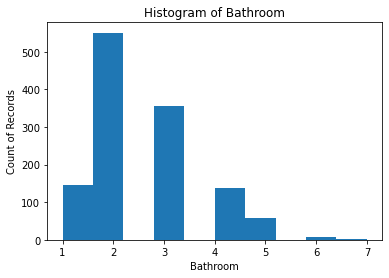

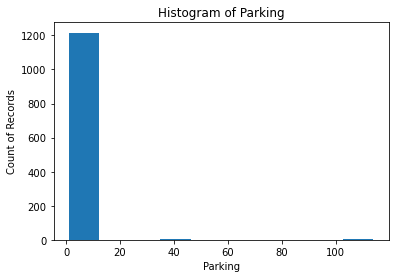

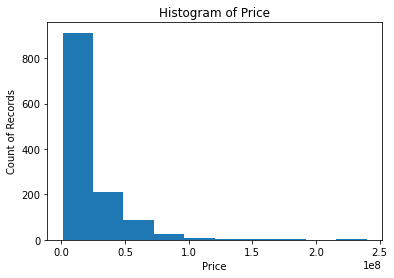

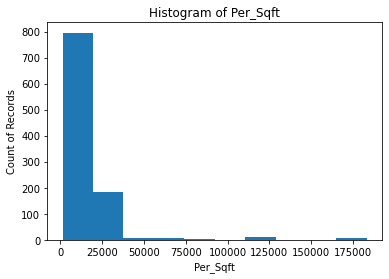

In [97]:
for feature in numerical:
    plt.hist(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count of Records")
    plt.title("Histogram of " + feature)
    plt.show()
    



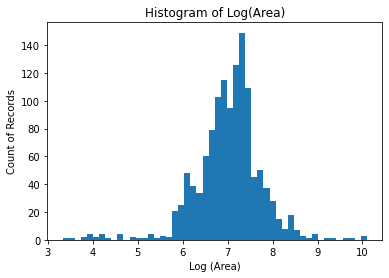

In [98]:
plt.hist(np.log(df["Area"]), bins=50)
plt.xlabel("Log (Area)")
plt.ylabel("Count of Records")
plt.title("Histogram of Log(Area)")
plt.show()

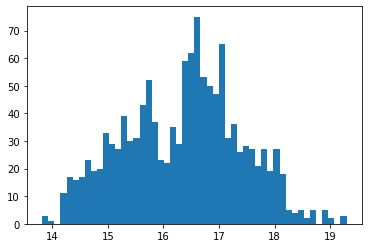

In [99]:
plt.hist(np.log(df["Price"]), bins=50)
plt.show()

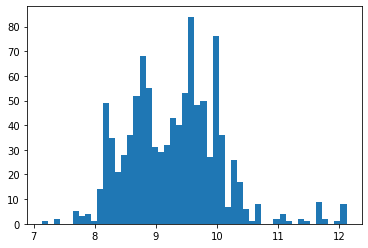

In [100]:
plt.hist(np.log(df["Per_Sqft"]), bins=50)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


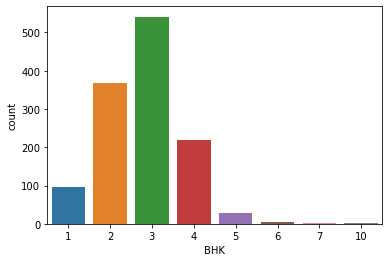

In [101]:
print(sns.countplot(df["BHK"]))

In [102]:
df.BHK.value_counts()

3     541
2     367
4     220
1      96
5      27
6       6
10      1
7       1
Name: BHK, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


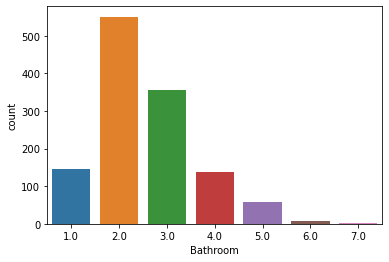

In [103]:
print(sns.countplot(df["Bathroom"]))

In [104]:
df.Bathroom.value_counts()

2.0    551
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: Bathroom, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


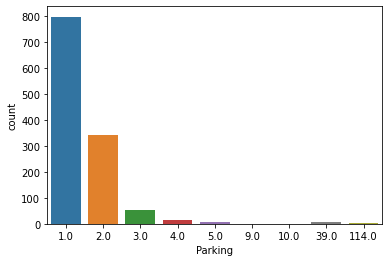

In [105]:
print(sns.countplot(df["Parking"]))

In [106]:
df.Parking.value_counts()

1.0      796
2.0      341
3.0       54
4.0       16
39.0       7
5.0        7
114.0      3
10.0       1
9.0        1
Name: Parking, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


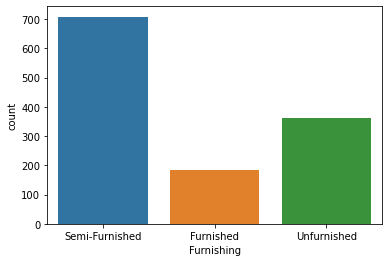

In [107]:
print(sns.countplot(df["Furnishing"]))

In [108]:
df.Furnishing.value_counts()

Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64

In [109]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


Ready_to_move    1184
Almost_ready       75
Name: Status, dtype: int64


<AxesSubplot:xlabel='Status', ylabel='count'>

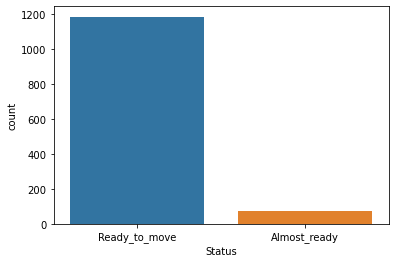

In [110]:
print(df.Status.value_counts())
sns.countplot(df.Status)

Resale          781
New_Property    478
Name: Transaction, dtype: int64


<AxesSubplot:xlabel='Transaction', ylabel='count'>

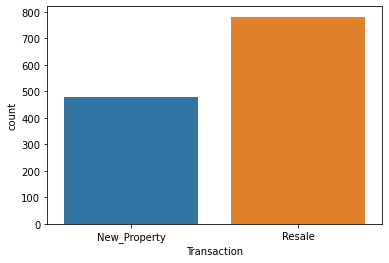

In [111]:
print(df.Transaction.value_counts())
sns.countplot(df.Transaction)

Builder_Floor    661
Apartment        593
Name: Type, dtype: int64


<AxesSubplot:xlabel='Type', ylabel='count'>

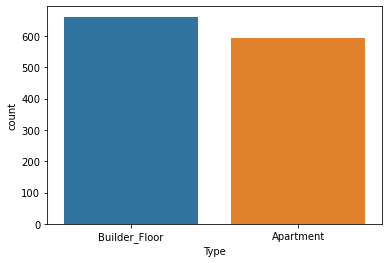

In [112]:
print(df.Type.value_counts())
sns.countplot(df.Type)

In [113]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


<AxesSubplot:xlabel='Area', ylabel='Price'>

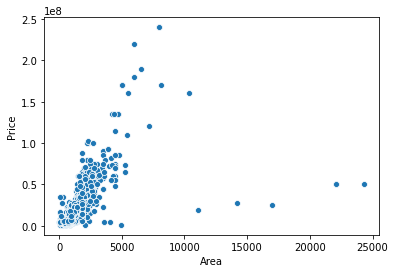

In [114]:
sns.scatterplot(x=df["Area"], y=df["Price"])

<AxesSubplot:xlabel='Per_Sqft', ylabel='Price'>

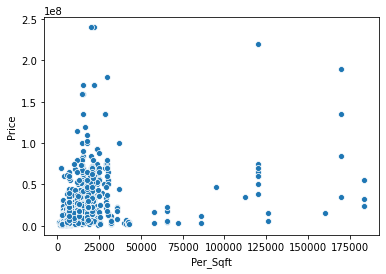

In [115]:
sns.scatterplot(x=df["Per_Sqft"], y=df["Price"])

<AxesSubplot:xlabel='Per_Sqft', ylabel='Price'>

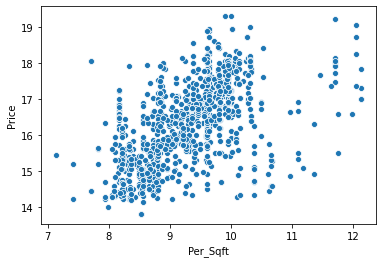

In [116]:
sns.scatterplot(x=np.log(df["Per_Sqft"]), y=np.log(df["Price"]))

In [117]:
temp = pd.pivot_table(data=df, index="BHK", aggfunc="median")
temp

,Area,Bathroom,Parking,Per_Sqft,Price
BHK,,,,,
1,405.0,1.0,1.0,5222.0,2300000
2,825.0,2.0,1.0,8333.0,7000000
3,1350.0,3.0,1.0,11639.0,17200000
4,2250.0,4.0,2.0,15278.0,43100000
5,3405.0,5.0,2.5,20967.0,70000000
6,2600.0,4.0,1.0,15138.5,15350000
7,2970.0,4.0,1.0,8923.0,26500000
10,1200.0,4.0,2.0,NaN,17000000


<AxesSubplot:xlabel='BHK', ylabel='Price'>

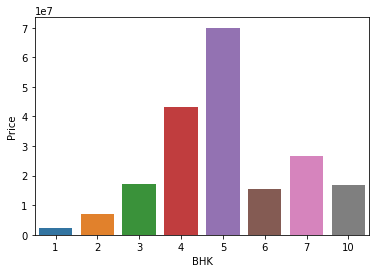

In [118]:
sns.barplot(x=temp.index,y=temp.Price)

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

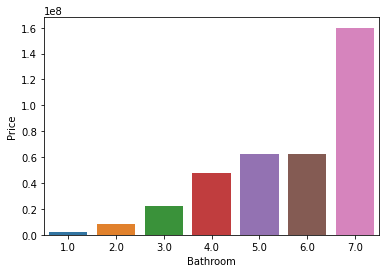

In [119]:
temp = pd.pivot_table(data=df, index="Bathroom", aggfunc="median")
sns.barplot(x=temp.index,y=temp.Price)

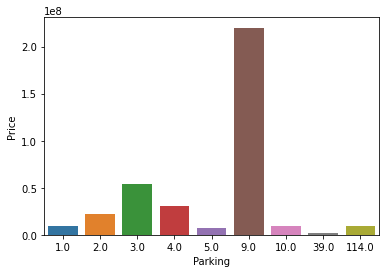

In [120]:
temp = pd.pivot_table(data=df, index="Parking", aggfunc="median")
sns.barplot(x=temp.index,y=temp.Price)
plt.show()

In [121]:
df[df.Parking == 9]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
242,6000.0,5,5.0,Semi-Furnished,"Maharani Bagh, New Friends Colony",9.0,220000000,Ready_to_move,New_Property,Builder_Floor,120000.0


<AxesSubplot:xlabel='Furnishing', ylabel='Price'>

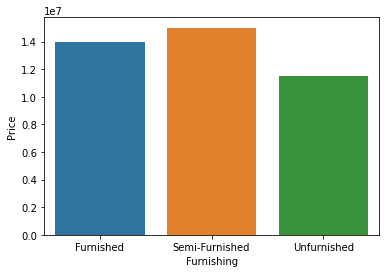

In [122]:
temp = pd.pivot_table(data=df, index="Furnishing", aggfunc="median")
sns.barplot(x=temp.index,y=temp.Price)

<AxesSubplot:xlabel='Status', ylabel='Price'>

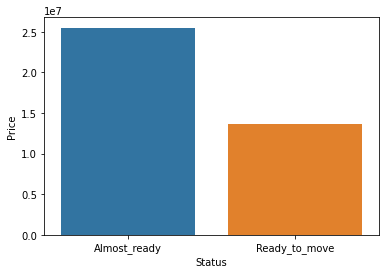

In [123]:
#### only feature affecting the "Price"

temp = pd.pivot_table(data=df, index="Status", aggfunc="median")
sns.barplot(x=temp.index,y=temp.Price)

<AxesSubplot:xlabel='Transaction', ylabel='Price'>

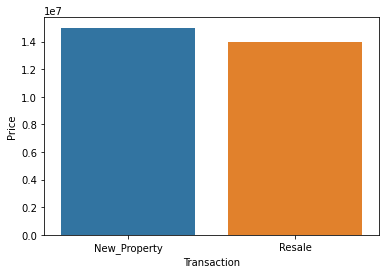

In [124]:
temp = pd.pivot_table(data=df, index="Transaction", aggfunc="median")
sns.barplot(x=temp.index,y=temp.Price)

<AxesSubplot:xlabel='Type', ylabel='Price'>

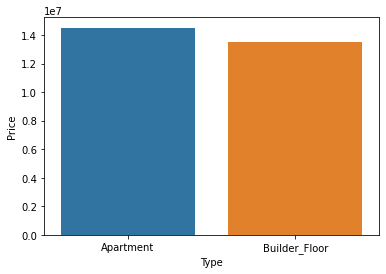

In [125]:
temp = pd.pivot_table(data=df, index="Type", aggfunc="median")
sns.barplot(x=temp.index,y=temp.Price)

In [126]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


<AxesSubplot:xlabel='Area'>

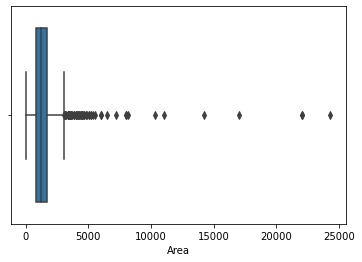

In [127]:
sns.boxplot(df["Area"])

<AxesSubplot:xlabel='BHK'>

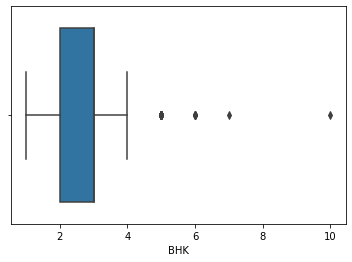

In [128]:
sns.boxplot(df["BHK"])

<AxesSubplot:xlabel='Price'>

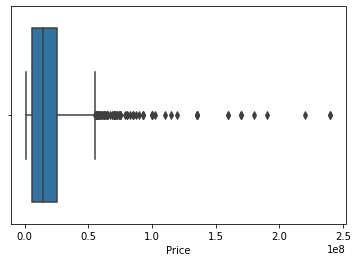

In [129]:
sns.boxplot(df["Price"])

<AxesSubplot:xlabel='Parking'>

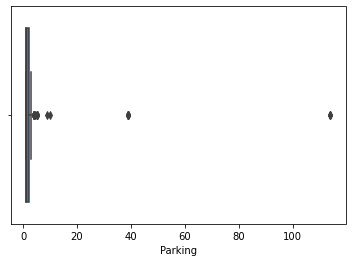

In [130]:
sns.boxplot(df["Parking"])

<AxesSubplot:xlabel='Per_Sqft'>

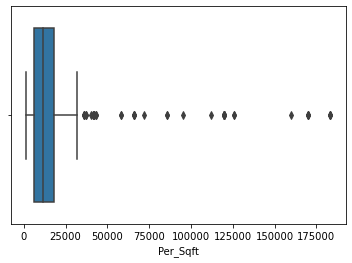

In [131]:
sns.boxplot(df["Per_Sqft"])

<AxesSubplot:>

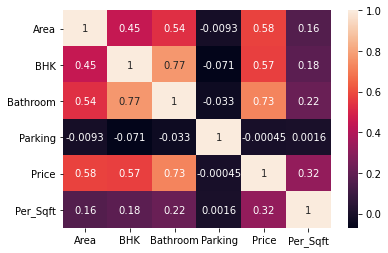

In [132]:
sns.heatmap(df.corr(),annot=True)

In [133]:
col_corr = set()
def correlation(dataset, threshold):
     # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)

In [134]:
correlation(df,.7)

In [135]:
col_corr

{'Bathroom'}

In [136]:
df_reduced = df.loc[(df["Price"]<1e8) & (df["Area"]<10000) &
           (df["BHK"]<8) & (df["Parking"]<9) & (df["Per_Sqft"]<50000)]

In [137]:
print("Shape of orginal dataset:", df.shape)
print("Shape of reduced dataset:", df_reduced.shape)

Shape of orginal dataset: (1259, 11)
Shape of reduced dataset: (944, 11)


In [138]:
df_reduced.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [139]:
df_reduced.drop('Locality',inplace=True,axis=1)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [140]:
df_reduced.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [141]:
num_reduced = [f for f in df_reduced.columns if df_reduced[f].dtypes !='O']
cat_reduced = [f for f in df_reduced.columns if df_reduced[f].dtypes =='O']

In [142]:
num_reduced,cat_reduced

(['Area', 'BHK', 'Bathroom', 'Parking', 'Price', 'Per_Sqft'],
 ['Furnishing', 'Status', 'Transaction', 'Type'])

In [143]:
#But we have to change BHK,Bathroom,Parking into categorical

cat_reduced = ['Furnishing', 'Status', 'Transaction', 'Type','BHK', 'Bathroom', 'Parking']
num_reduced = ['Area', 'Price', 'Per_Sqft']

In [144]:
for col in cat_reduced:
    df_reduced[col] = df_reduced[col].astype(str)

<ipython-input-144-43e027c7c49a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[col] = df_reduced[col].astype(str)


In [81]:
for col in num_reduced:
    df_reduced[col] = np.log(df_reduced[col])

<ipython-input-81-40ccfc85381b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[col] = np.log(df_reduced[col])


In [145]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 1 to 1257
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         944 non-null    float64
 1   BHK          944 non-null    object 
 2   Bathroom     944 non-null    object 
 3   Furnishing   944 non-null    object 
 4   Parking      944 non-null    object 
 5   Price        944 non-null    int64  
 6   Status       944 non-null    object 
 7   Transaction  944 non-null    object 
 8   Type         944 non-null    object 
 9   Per_Sqft     944 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 81.1+ KB


In [146]:
df_reduced.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [147]:
df_reduced = pd.get_dummies(df_reduced,drop_first=True)

In [148]:
df_reduced.head()

,Area,Price,Per_Sqft,BHK_2,BHK_3,BHK_4,BHK_5,BHK_6,BHK_7,Bathroom_2.0,Bathroom_3.0,Bathroom_4.0,Bathroom_5.0,Bathroom_6.0,Bathroom_7.0,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Parking_2.0,Parking_3.0,Parking_4.0,Parking_5.0,Status_Ready_to_move,Transaction_Resale,Type_Builder_Floor
1,750.0,5000000,6667.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,950.0,15500000,6667.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,600.0,4200000,6667.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1
4,650.0,6200000,6667.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
5,1300.0,15500000,6667.0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1


In [149]:
pd.set_option("max_columns",None)

# Model Building

In [150]:
y = df_reduced["Price"].copy()
X = df_reduced.drop("Price", axis=1)

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [152]:
X_train.head()

,Area,Per_Sqft,BHK_2,BHK_3,BHK_4,BHK_5,BHK_6,BHK_7,Bathroom_2.0,Bathroom_3.0,Bathroom_4.0,Bathroom_5.0,Bathroom_6.0,Bathroom_7.0,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Parking_2.0,Parking_3.0,Parking_4.0,Parking_5.0,Status_Ready_to_move,Transaction_Resale,Type_Builder_Floor
314,675.0,6526.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
119,1600.0,15556.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,1
394,1000.0,6111.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
429,1530.0,7500.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1
571,1500.0,25000.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1


### Checking for Train Set

In [153]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [154]:
from sklearn.metrics import mean_squared_error, r2_score

rf_predictions = rf.predict(X_train)

print("RMSE:", np.sqrt(mean_squared_error(rf_predictions, y_train)))
print("R-Squared:", r2_score(y_train, rf_predictions))


RMSE: 2706785.670412115
R-Squared: 0.9803119120458548


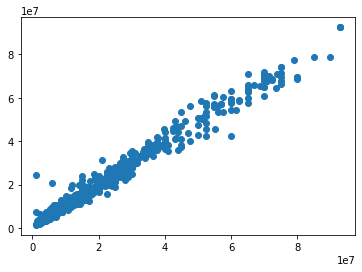

In [155]:
plt.scatter(x=y_train, y=rf_predictions)

<AxesSubplot:xlabel='Price'>

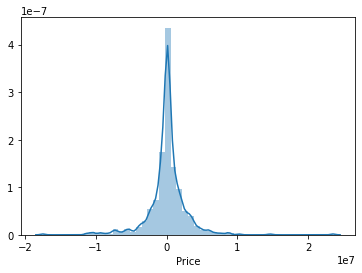

In [156]:
sns.distplot(rf_predictions-y_train)

### Cross validation for checking overfitting

In [157]:
from sklearn.model_selection import cross_val_score

cv_rf_scores = cross_val_score(rf, X_train, y_train,
                        scoring="neg_mean_squared_error",cv=10)

cv_rf_rmse = np.sqrt(-cv_rf_scores)

In [158]:
def display_scores(score):
    print("Scores:", score)
    print("Mean:", score.mean())
    print("Standar Deviation:", score.std())

In [159]:
display_scores(cv_rf_rmse)

Scores: [ 5244931.70656541 10217241.62131294  5113509.89388477  6049995.10405608
  8070289.25645509  9821774.03955865  6745968.57885755  7314965.16857002
  7746406.33427264  8113296.63338829]
Mean: 7443837.833692144
Standar Deviation: 1642880.306475696


### Now for Test Dataset

In [160]:
X_test = pd.DataFrame(X_test, columns=X_test.columns)

rf_test_predictions = rf.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(rf_test_predictions, y_test)))
print("R-Squared:", r2_score(y_test, rf_test_predictions))

RMSE: 8743817.424440138
R-Squared: 0.7184382813139027


## Hyperparameter Tuning
- RandomizeSearchCV

In [161]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse','mae']}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse', 'mae']}


In [162]:
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [163]:
rf_randomcv.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 560,
 'criterion': 'mse'}

In [164]:
best_rf = rf_randomcv.best_estimator_

In [165]:
### Training Set

best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=560, max_features='log2', n_estimators=1800)

In [166]:
rf_predictions = best_rf.predict(X_train)

print("RMSE:", np.sqrt(mean_squared_error(rf_predictions, y_train)))
print("R-Squared:", r2_score(y_train, rf_predictions))

RMSE: 2564185.292396076
R-Squared: 0.9823317061679732


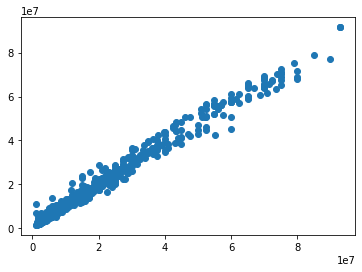

In [167]:
plt.scatter(x=y_train, y=rf_predictions)

<AxesSubplot:xlabel='Price'>

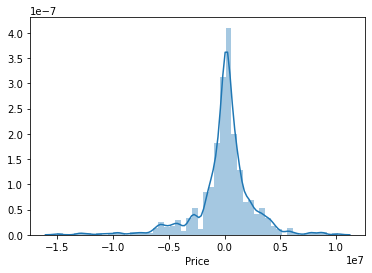

In [168]:
sns.distplot(rf_predictions-y_train)

### For test Dateset

In [169]:
X_test = pd.DataFrame(X_test, columns=X_test.columns)

rf_test_predictions = best_rf.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(rf_test_predictions, y_test)))
print("R-Squared:", r2_score(y_test, rf_test_predictions))

RMSE: 7741060.042177888
R-Squared: 0.779315252568703


## Hyperparameter Tuning
- GridSearchCV

In [170]:
rf_randomcv.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 560,
 'criterion': 'mse'}

In [171]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['mse'], 'max_depth': [560], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1600, 1700, 1800, 1900, 2000]}


In [172]:
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 10.6min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': [560],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [1600, 1700, 1800, 1900, 2000]},
             verbose=2)

In [173]:
best_grid=grid_search.best_estimator_

In [174]:
best_grid

RandomForestRegressor(max_depth=560, max_features='log2', n_estimators=1800)

In [175]:
### Training Set

best_grid.fit(X_train, y_train)

RandomForestRegressor(max_depth=560, max_features='log2', n_estimators=1800)

In [176]:
rf_predictions = best_grid.predict(X_train)

print("RMSE:", np.sqrt(mean_squared_error(rf_predictions, y_train)))
print("R-Squared:", r2_score(y_train, rf_predictions))

RMSE: 2571466.305289385
R-Squared: 0.9822312253510825


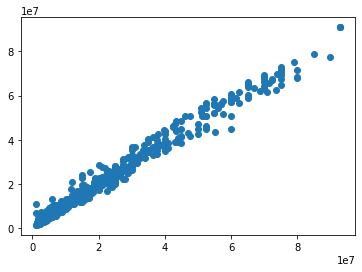

In [177]:
plt.scatter(x=y_train, y=rf_predictions)

<AxesSubplot:xlabel='Price'>

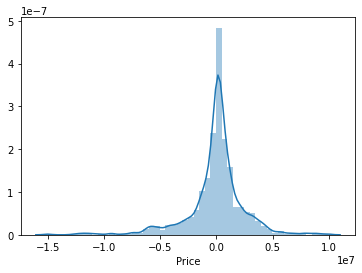

In [178]:
sns.distplot(rf_predictions-y_train)

### For test Dateset

In [179]:
X_test = pd.DataFrame((X_test), columns=X_test.columns)

rf_test_predictions = best_grid.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(rf_test_predictions, y_test)))
print("R-Squared:", r2_score(y_test, rf_test_predictions))

RMSE: 7794274.639712302
R-Squared: 0.7762707044545425


In [100]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(best_grid, file)